# Problem Statement :
The objective of this Case is the Predication of daily bike rental count based on the
environmental and seasonal settings.


In [1]:
#Import Libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [2]:
#Setting the working directory
os.chdir("C:/Users/Sreejith/Documents/Sreejith/Edwisor/Project 2")
os.getcwd()

'C:\\Users\\Sreejith\\Documents\\Sreejith\\Edwisor\\Project 2'

In [3]:
#Loading the data
df= pd.read_csv("day.csv")

# Exploratory Data Analysis & Data pre-processing:

In [4]:
#Checking the first 5 rows to understand the train data
df.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


cnt is the total count of bike rentals including the casual and registered rides.

In [5]:
# shape and data types of the data
print(df.shape)
print(df.dtypes) 

(731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


OBSERVATION: We see that 'season','yr','mnth','holiday','weekday','workingday','weathersit' are factors/conditions and therefore we will convert the datatype to category.
'dteday' is datetime.

In [6]:
#Datatype correction

df['dteday']=pd.to_datetime(df.dteday)
df['season']=df.season.astype('category')
df['yr']=df.yr.astype('category')
df['mnth']=df.mnth.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')

In [7]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [8]:
df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Checking the number of null values/ Missing values
print (df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
#Checking the number of unique values of variables
print (df.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


OBSERVATION: instant acts as the serial number and does not have any effect on the count. Similarly, the date is also unique. 

<AxesSubplot:>

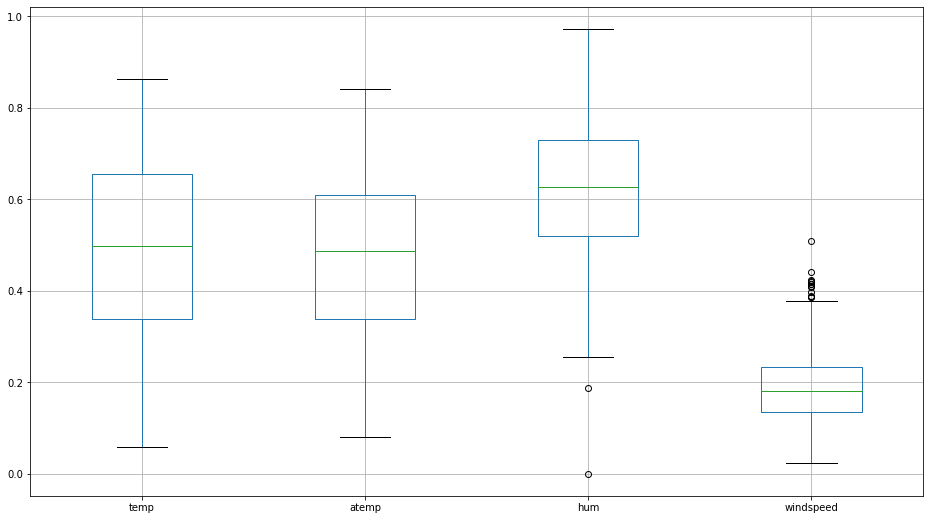

In [11]:
#Outlier Analysis
plt.figure(figsize=(16,9))
df[['temp', 'atemp', 'hum', 'windspeed']].boxplot()

OBSERVATIONS: We see outliers in humidity, windspeed. These might be naturally occuring outliers or errors.

In [12]:
for i in df[['temp', 'atemp', 'hum', 'windspeed']]:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    
    # replace outliers with NA

    df.loc[df[i]<Innerfence, i] = np.nan
    df.loc[df[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645


In [13]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

OBSERVATION: The outliers are imputed with NA in 'hum' and 'windspeed'. There were 2 outliers in 'hum' and 13 in 'windspeed'. Lets impute these outliers with median

In [14]:
# impute the values, by the median.
df['hum'] = df['hum'].fillna(df['hum'].median())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Relationship plots

<AxesSubplot:xlabel='yr', ylabel='cnt'>

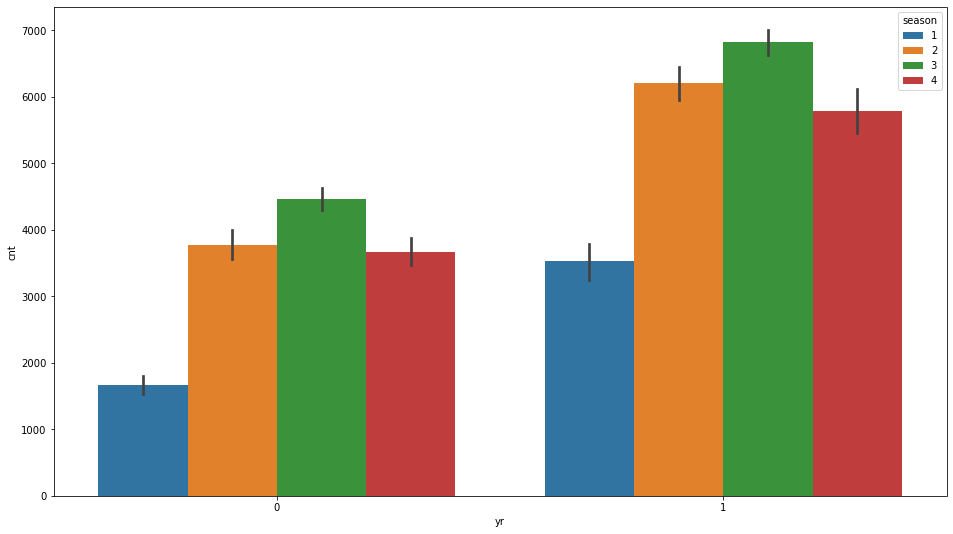

In [15]:
# Season vs total count in 2011 and 2012
plt.figure(figsize=(16,9))
sns.barplot(data=df, x="yr", y="cnt", hue= "season")

Here, season 1, 2, 3 and 4 are spring, summer, fall and winter, and yr 0 and 1 are 2011 and 2012 repectively. From the chart its clear that the seasonal effect on count in 2011 and 2012 is same although the count increased in 2012.

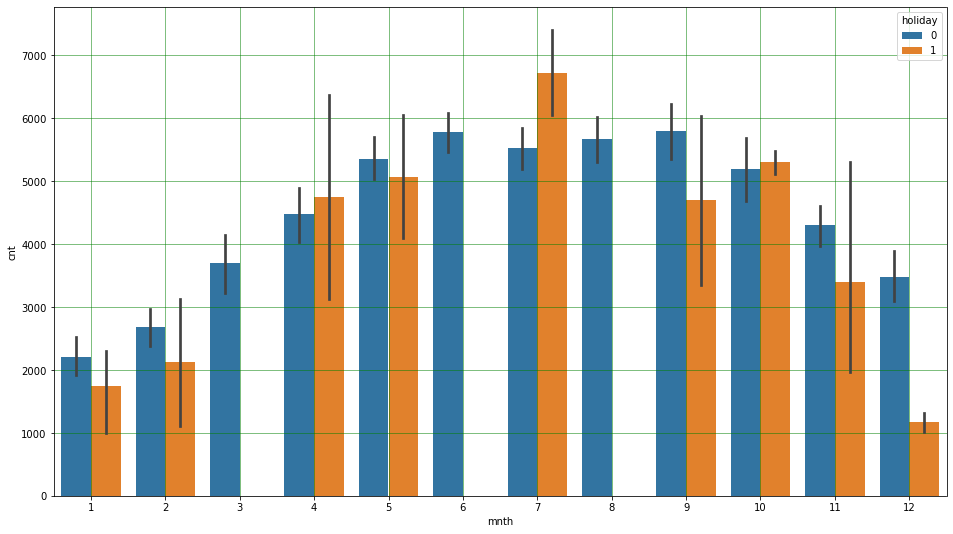

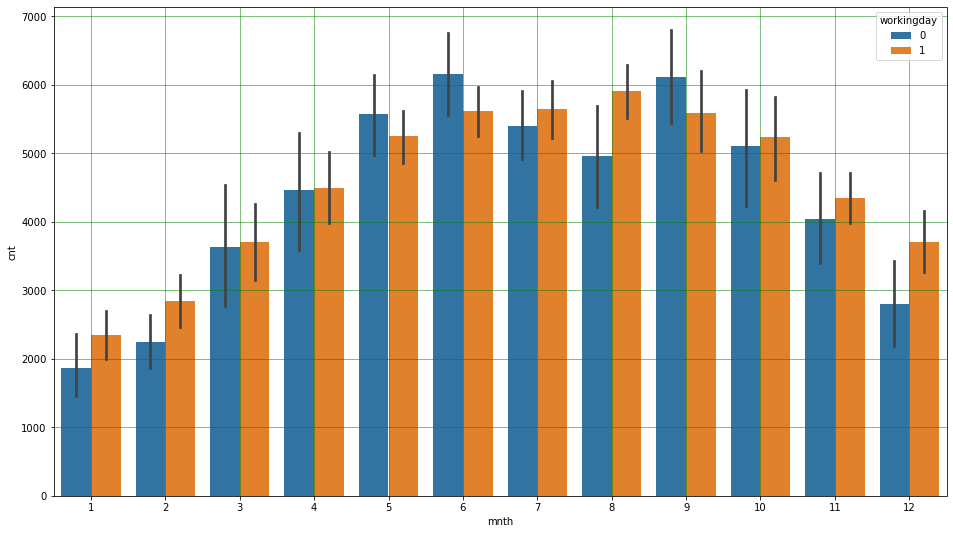

In [16]:
# monthly holiday vs total count 
plt.figure(figsize=(16,9))
sns.barplot(data=df, x="mnth", y="cnt", hue="holiday")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# monthly workingday vs total count 
plt.figure(figsize=(16,9))
sns.barplot(data=df, x="mnth", y="cnt", hue="workingday")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the above two graghs,taking months 3, 6, and 8 we see that weekends do contribute to the bike count. Even then the working day count overall is more.

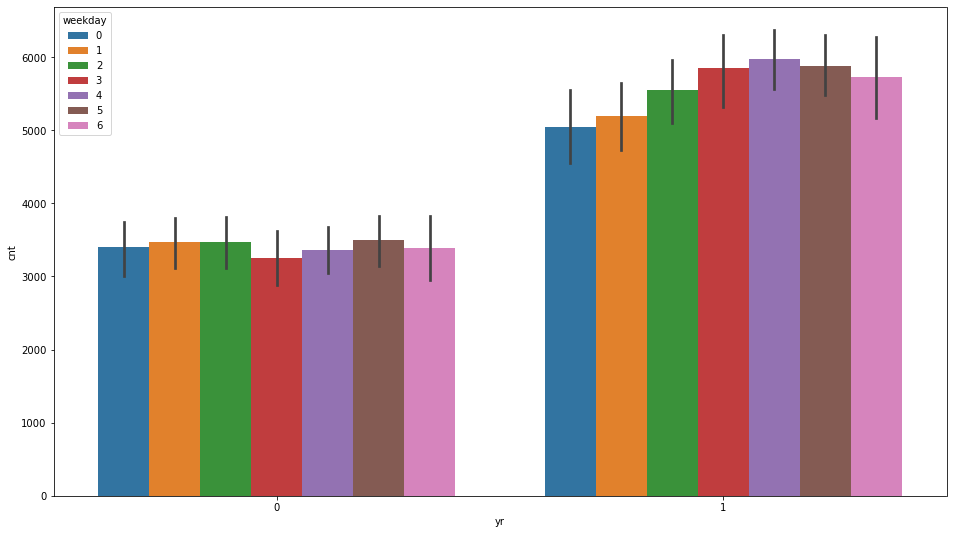

In [17]:
# weekday vs total count
plt.figure(figsize=(16,9))
sns.barplot(data=df, x="yr", y="cnt",hue="weekday")
plt.show()

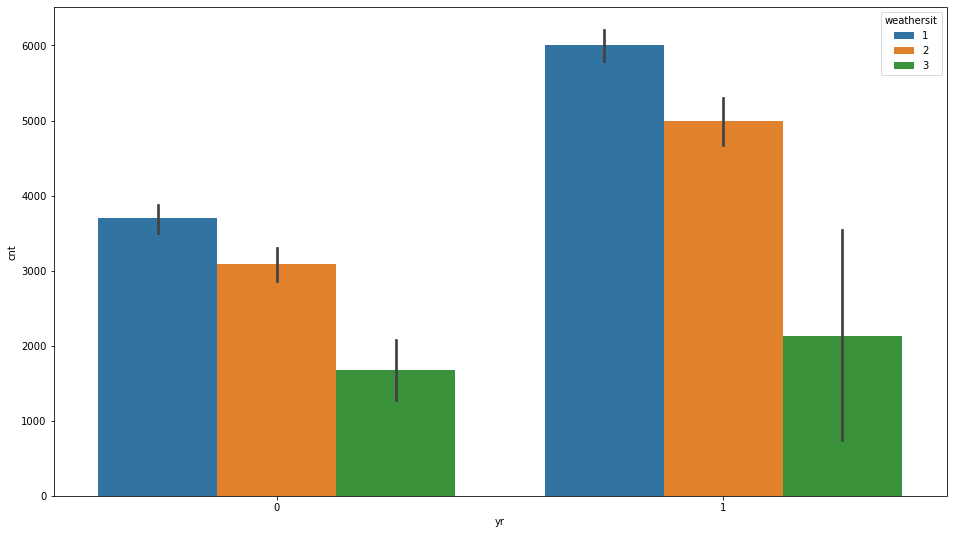

In [18]:
# weather vs total count
plt.figure(figsize=(16,9))
sns.barplot(data=df, x="yr", y="cnt", hue= "weathersit")
plt.show()

Here, weathersit 1 is clear, Few clouds, Partly cloudy; 2 is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3 is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds and 4 is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. Despite the yearly increase in the count, the trend is same here too. Clear weather has more rentals and harsh weather has less rentals.

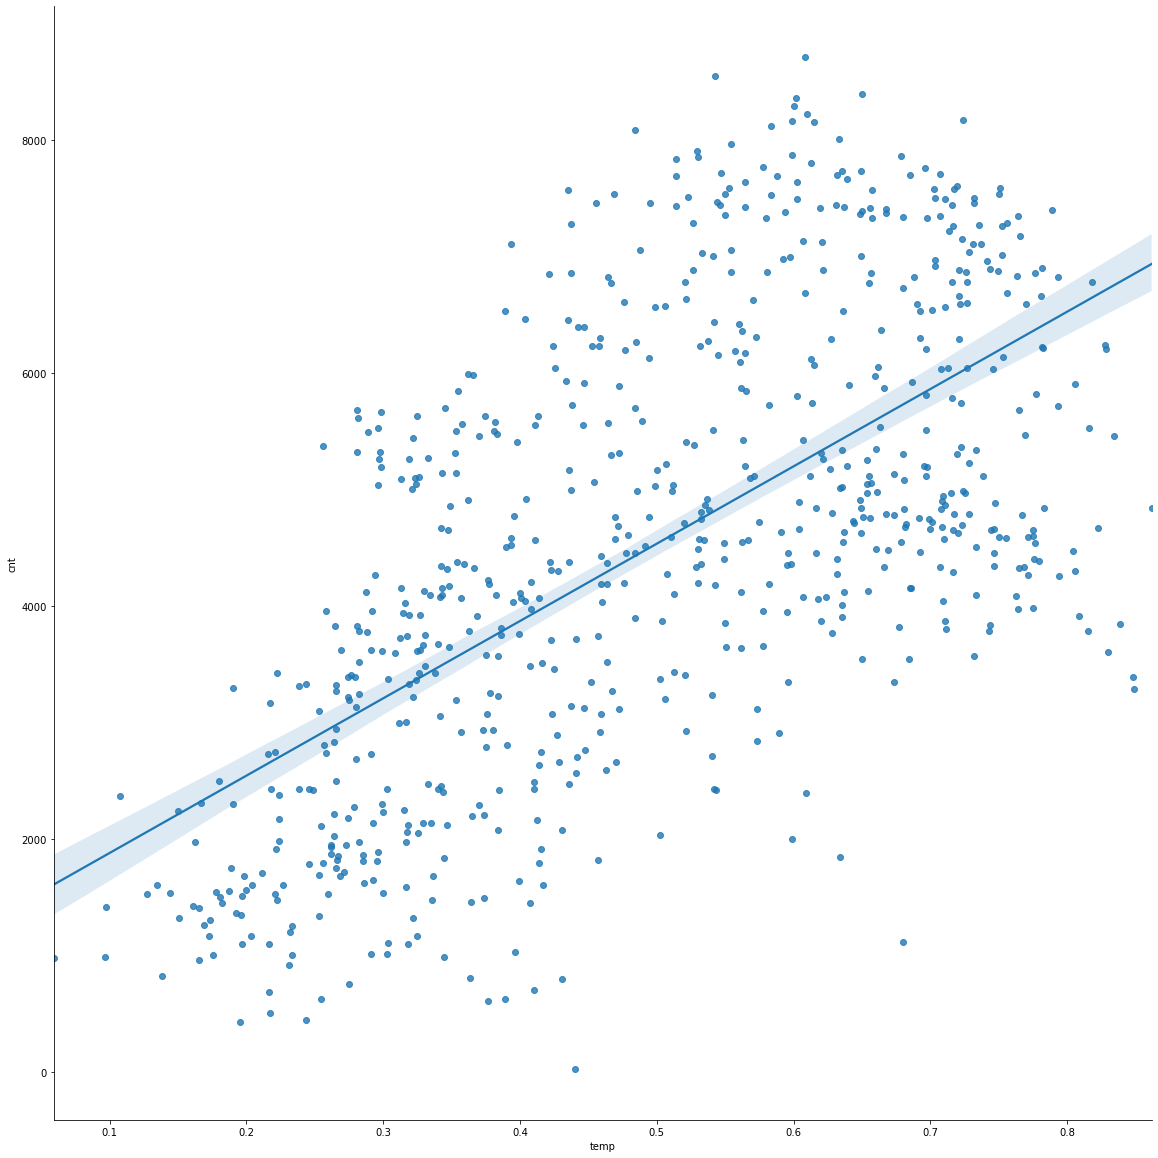

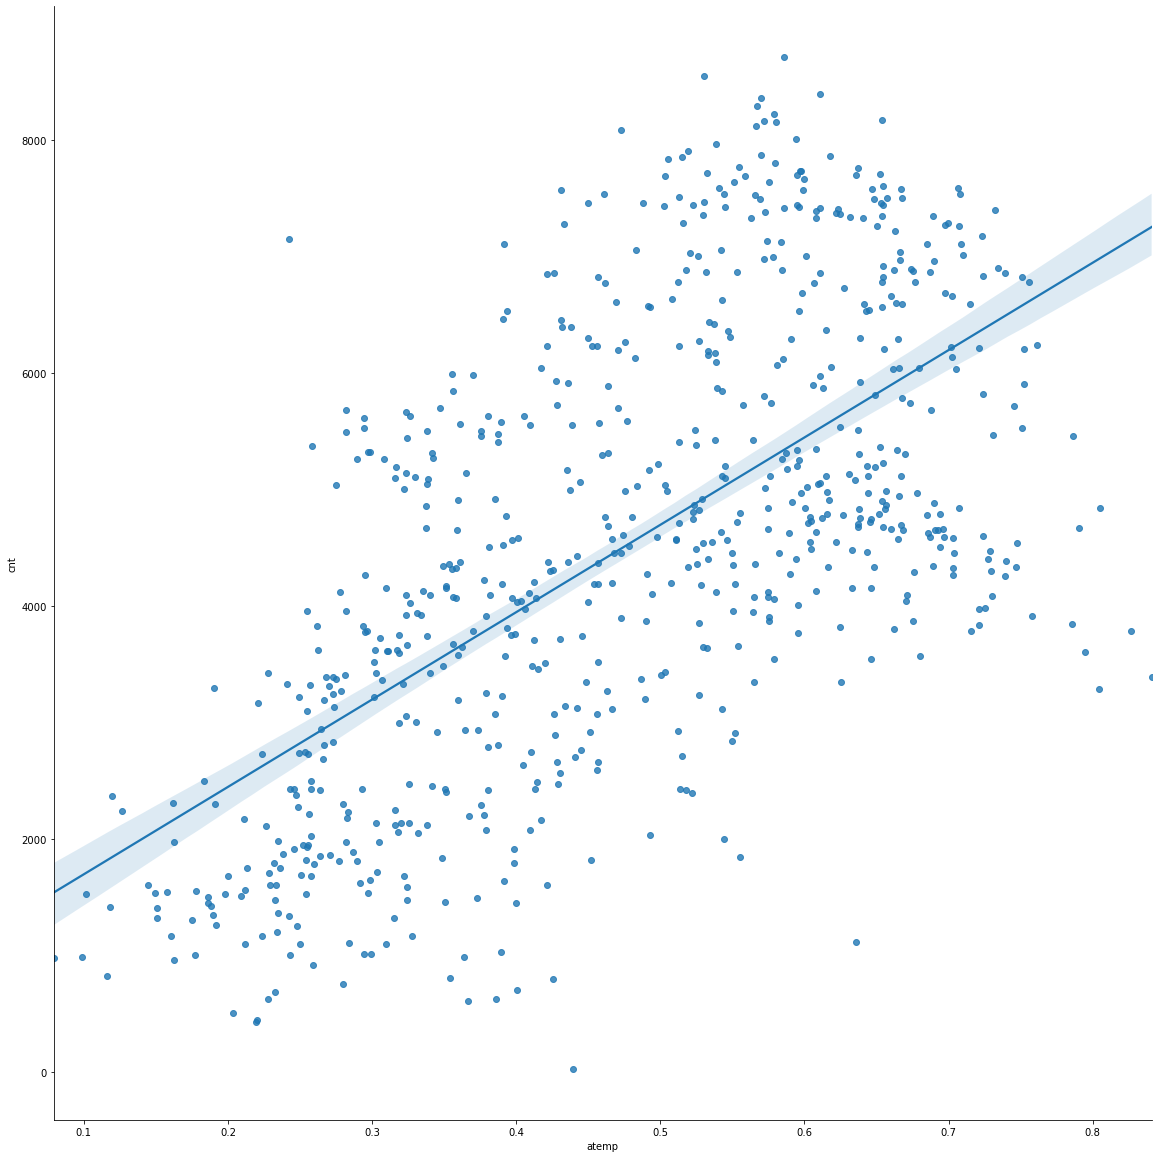

In [19]:
# temperature vs total count
sns.lmplot(x ='temp', y ='cnt', data = df, aspect = 1, 
           height =16)
plt.show()

# feeling temperature vs total count
sns.lmplot(x ='atemp', y ='cnt', data = df, aspect = 1, 
           height =16)
plt.show()

A linear relationship between temperature and count can be seen. 

A linear relationship between  feeling temperature and count can be seen. Ideally temp and atemp will be highly correlated.

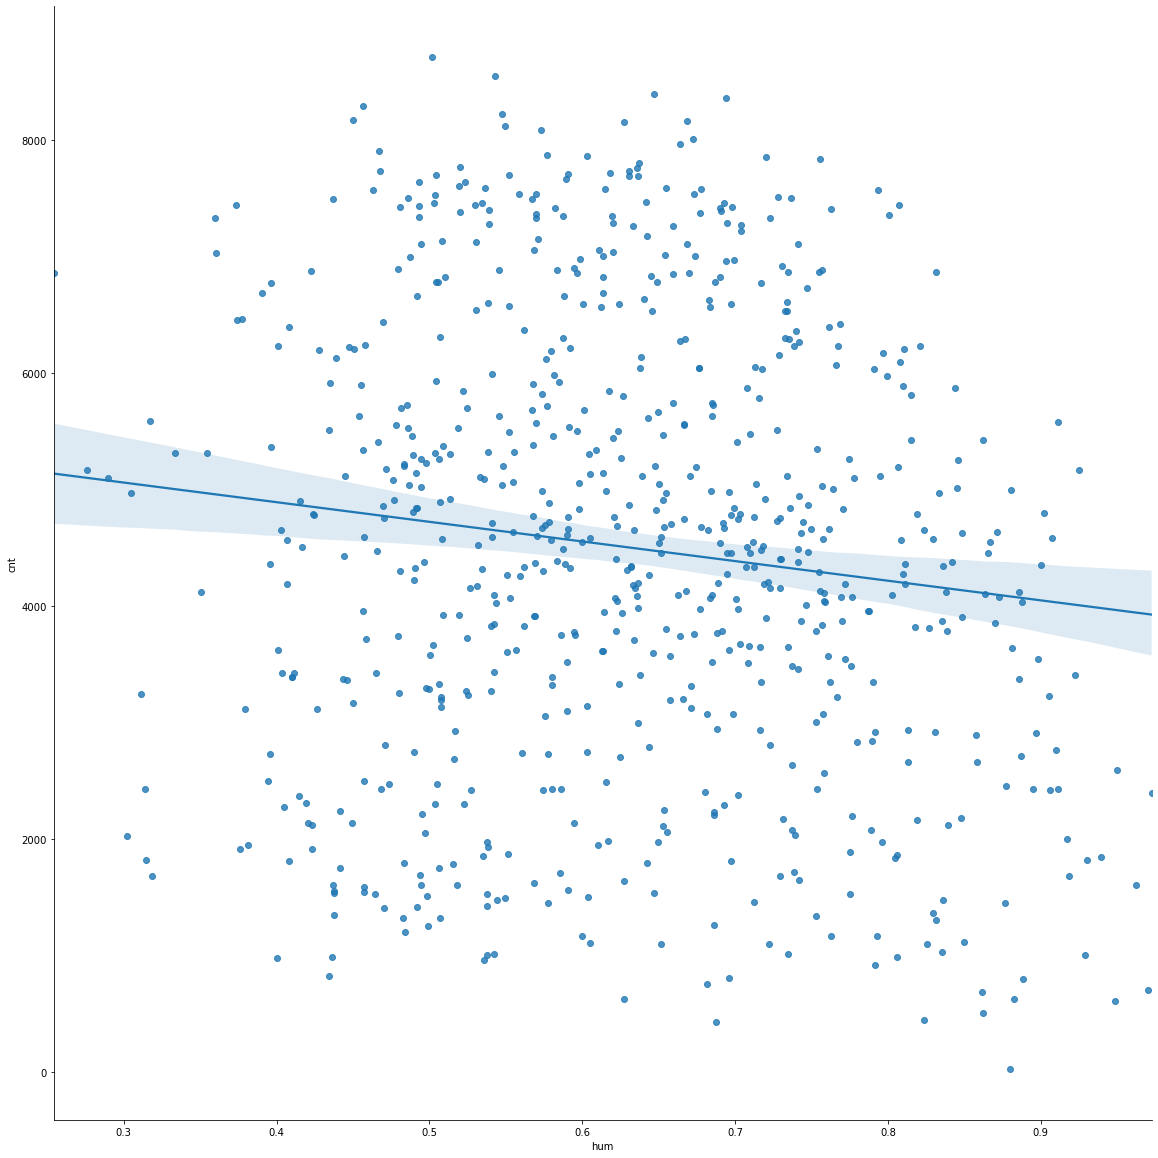

In [20]:
# humidity vs total count
sns.lmplot(x ='hum', y ='cnt', data = df, aspect = 1, 
           height =16)

Humidity have a negative impact on the count.

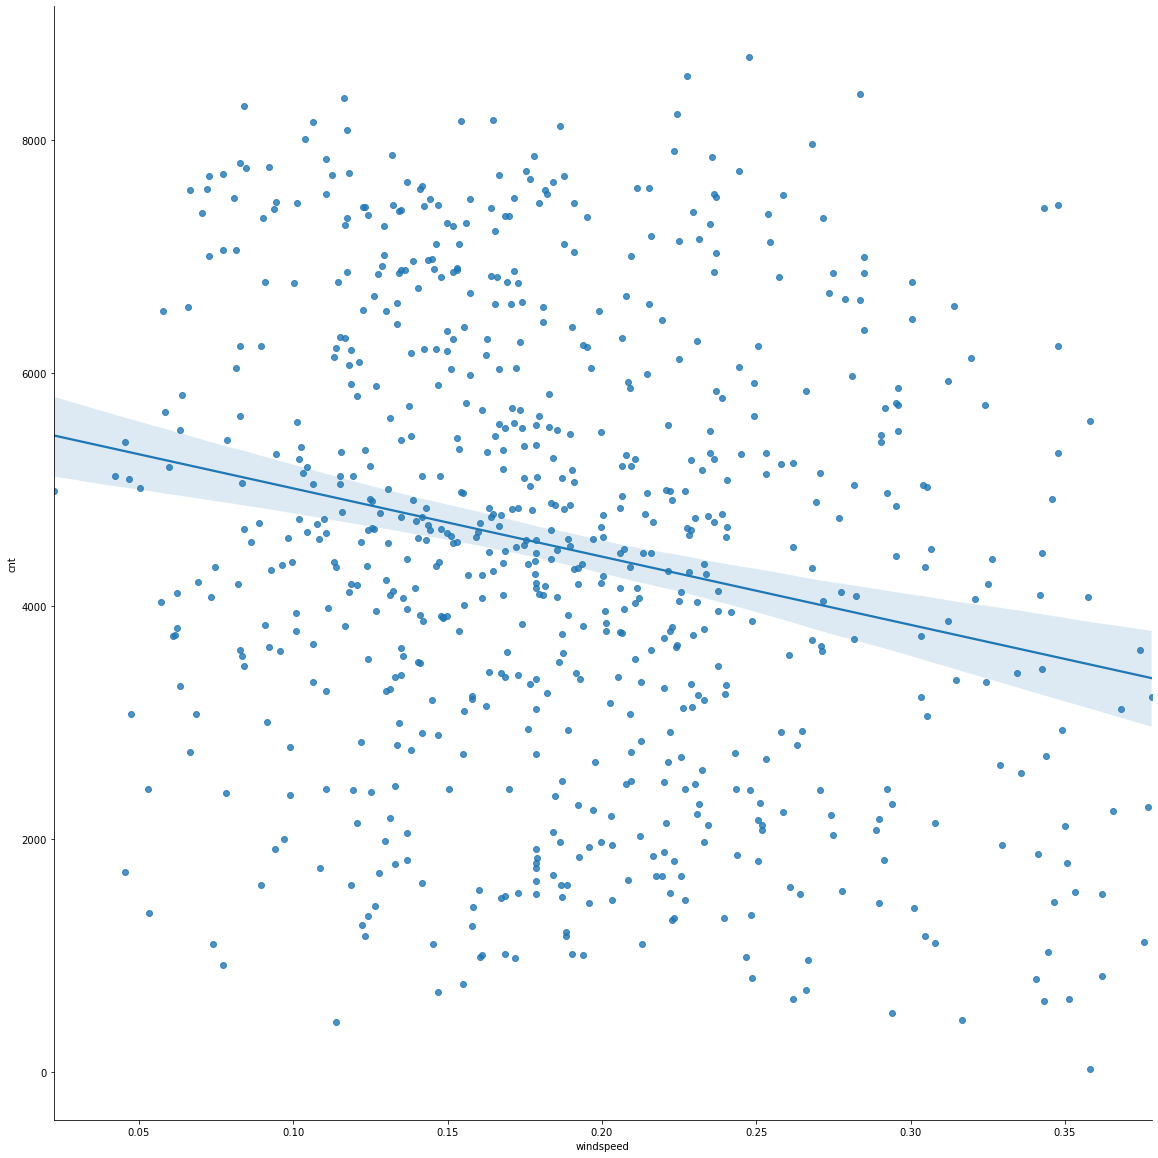

In [21]:
# windspeed vs total count
sns.lmplot(x ='windspeed', y ='cnt', data = df, aspect = 1, 
           height =16)

Windspeed also has a negative impact on the count.

# Feature Engineering

In this section we will reduce the features on the basis of relevance to the model building and scale them by standardization or normalization.

In [22]:
#backup
backup_df=df
#df=backup_df

In [23]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
#Feature Selection
#Index and dteday are not useful for the prediction of the bike count as former is the serial number of the data and the later is the date in ascending order and also we already have the useful data from the date like year, month, etc.
df = df.drop(columns=['instant','dteday'])

In [25]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<AxesSubplot:>

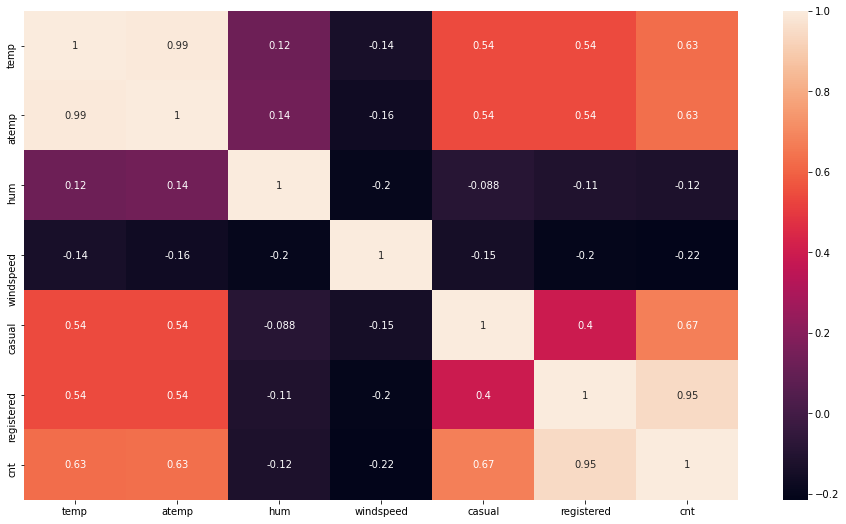

In [26]:
#Correlation Matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corrMatrix, annot=True)

As expected, the temp and atemp are highly correlated. Also, the registered rides and total rides are highly correlated. This indicates that most of the rides are registered rather than casual. 

In [27]:
#Feature Selection
#we will select temp and reduce the atemp due to correlation. Also, we will remove casual and registered.
df = df.drop(columns=['atemp','casual','registered'])

In [28]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


# Feature Scaling

In [29]:
#Spliting the features into categorical and numerical 
cat_var=['season','yr','mnth','holiday','weekday','workingday','weathersit']
num_var=['temp','hum','windspeed']

temp


C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


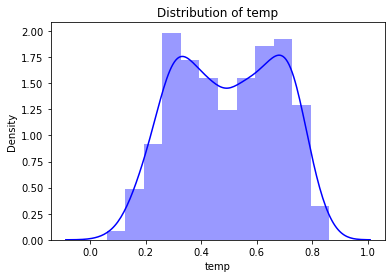

hum


C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


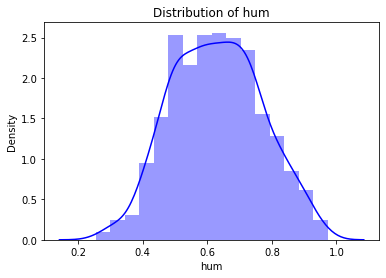

windspeed


C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


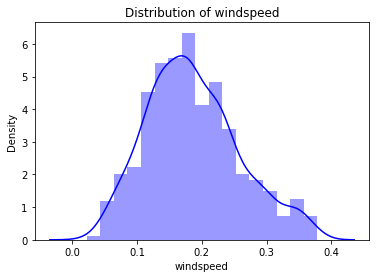

In [30]:
# Check normality 
for i in num_var:
    print(i)
    sns.distplot(df[i], bins = 'auto', color = 'blue')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

# Model

In [31]:
#'season','yr','mnth','holiday','weekday','workingday','weathersit'

In [32]:
#Create dummy variables for regression
df_dummy=pd.get_dummies(df,columns=cat_var)

In [33]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          731 non-null    float64
 1   hum           731 non-null    float64
 2   windspeed     731 non-null    float64
 3   cnt           731 non-null    int64  
 4   season_1      731 non-null    uint8  
 5   season_2      731 non-null    uint8  
 6   season_3      731 non-null    uint8  
 7   season_4      731 non-null    uint8  
 8   yr_0          731 non-null    uint8  
 9   yr_1          731 non-null    uint8  
 10  mnth_1        731 non-null    uint8  
 11  mnth_2        731 non-null    uint8  
 12  mnth_3        731 non-null    uint8  
 13  mnth_4        731 non-null    uint8  
 14  mnth_5        731 non-null    uint8  
 15  mnth_6        731 non-null    uint8  
 16  mnth_7        731 non-null    uint8  
 17  mnth_8        731 non-null    uint8  
 18  mnth_9        731 non-null    

In [34]:
#Defining the predictor variable and the target variable
X=df_dummy.drop(columns=['cnt'])
y=df_dummy['cnt']

In [35]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 15)

In [36]:
X_train.head()

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
301,0.254167,0.882500,0.351371,0,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
713,0.281667,0.642917,0.131229,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0
141,0.604167,0.749583,0.148008,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
649,0.435000,0.463333,0.181596,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
121,0.549167,0.730000,0.183454,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
y_train.head()

301     627
713    5611
141    4660
649    7570
121    4401
Name: cnt, dtype: int64

# Linear Regression 

In [38]:
regressor=LinearRegression()

In [39]:
# Building model on top of training dataset
LR_model = regressor.fit(X_train , y_train)

In [40]:
#coefficient of each variable selected by the LR model
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
temp,4396.140418
hum,-1566.302777
windspeed,-2776.518731
season_1,-876.300266
season_2,68.788471
season_3,17.066809
season_4,790.444986
yr_0,-961.487409
yr_1,961.487409
mnth_1,-285.843105


In [41]:
#Lets predict on test data
LR_pred = regressor.predict(X_test)

In [42]:
#Check the difference between the actual value and predicted value.
chk = pd.DataFrame({'Actual': y_test, 'Predicted': LR_pred})
chk_25=chk.head(25)
chk_25

,Actual,Predicted
304,4068,3650.072357
408,3422,3705.534839
120,3351,3280.566820
312,4109,3926.946011
690,5146,5757.250249
352,3403,3124.444573
77,3117,2807.050925
670,5986,5144.847335
224,4150,3973.644728
707,5582,4812.587386


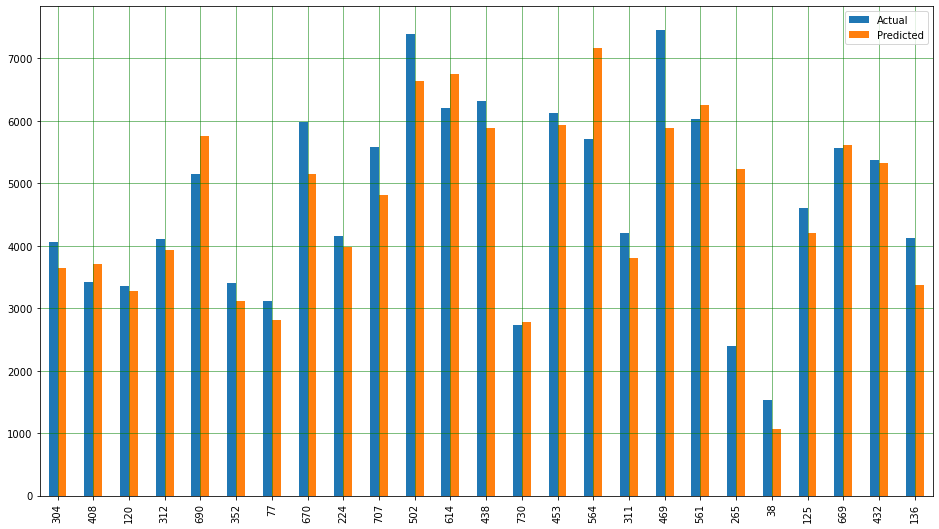

In [43]:
#Now let's plot the comparison of Actual and Predicted values
chk_25.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [44]:
#to evaluate the performance of the algorithm lets find the values for MAE, MSE, and RMSE.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))

Mean Absolute Error: 569.5251641212014
Mean Squared Error: 595747.4694853483
Root Mean Squared Error: 771.8467914588674


In [45]:
#Lets predict on train data
pred_train = regressor.predict(X_train)

In [46]:
#to evaluate the performance of the algorithm lets find the values for MAE, MSE, and RMSE.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred_train)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

Mean Absolute Error: 569.0782869642604
Mean Squared Error: 594586.403099555
Root Mean Squared Error: 771.0942893703435


The unit of RMSE is same as dependent variable. Our data has a range of 22 to 8714 then RMSE value of 771 is small, but if the range goes from 0 to 1, it is pretty huge. The smaller the RMSE value, the better the model.

Also, comparing RMSE values of both training and testing data, they are almost similar.Therefore, our model is good. If the RMSE for the testing data is much higher than that of the training data, it is likely that we've badly over fit the data.

In [47]:
#Rsquared
def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [48]:
#mape                                    #av= actual value and pv= predicted value
def mape(av, pv): 
    mape = np.mean(np.abs((av - pv) / av))*100
    return mape


In [49]:
#Prediction Accuracy and Rsquared
r2 = Rsquare(y_test, LR_pred)
r21 = r2.ravel()
rsquared = float(r21[1])
print("Accuracy = ",round((100-mape(y_test, LR_pred)),2),'%')
print("Rsquared =", rsquared)

Accuracy =  85.37 %
Rsquared = 0.8429676265964835


# Decision Tree

In [50]:
DT_regressor = DecisionTreeRegressor()

In [51]:
# Building model on top of training dataset
DT_model = DT_regressor.fit(X_train,y_train)

In [52]:
#Lets predict on test data
DT_pred = DT_regressor.predict(X_test)

In [53]:
#Check the difference between the actual value and predicted value.
DT_chk = pd.DataFrame({'Actual': y_test, 'Predicted': DT_pred})
DT_chk_25=chk.head(25)
DT_chk_25

,Actual,Predicted
304,4068,3650.072357
408,3422,3705.534839
120,3351,3280.566820
312,4109,3926.946011
690,5146,5757.250249
352,3403,3124.444573
77,3117,2807.050925
670,5986,5144.847335
224,4150,3973.644728
707,5582,4812.587386


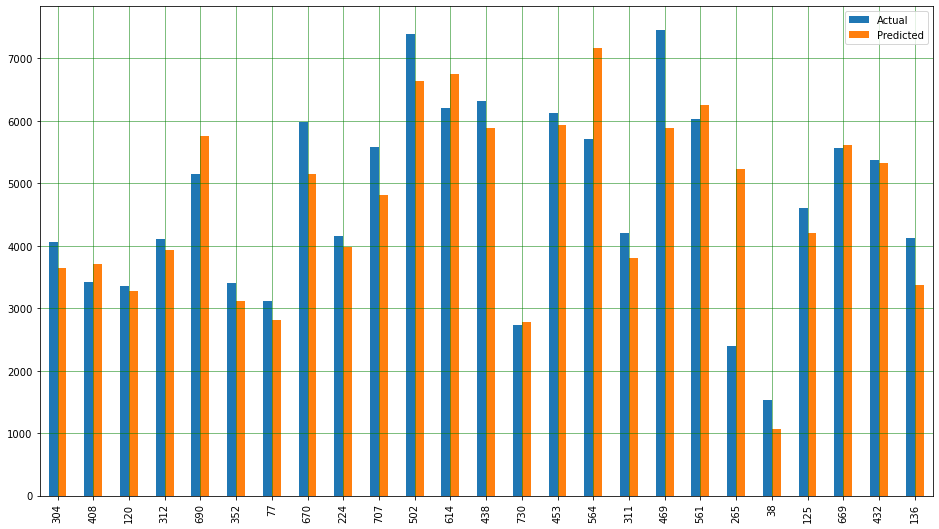

In [54]:
#Now let's plot the comparison of Actual and Predicted values
DT_chk_25.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [55]:
#The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, DT_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, DT_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, DT_pred)))

Mean Absolute Error: 581.4590163934427
Mean Squared Error: 653168.1256830601
Root Mean Squared Error: 808.1881746741041


In [56]:
#Prediction Accuracy and Rsquared
r2 = Rsquare(y_test, DT_pred)
r21 = r2.ravel()
rsquared = float(r21[1])
print("Accuracy = ",round((100-mape(y_test, DT_pred)),2),'%')
print("Rsquared =", rsquared)

Accuracy =  84.22 %
Rsquared = 0.8339550155155592


# Random Forest Regressor

In [57]:
RF_regressor = RandomForestRegressor(n_estimators=100)

In [58]:
# Building model on top of training dataset
RF_model = RF_regressor.fit(X_train,y_train)

In [59]:
#Lets predict on test data
RF_pred = RF_regressor.predict(X_test)

In [60]:
#Check the difference between the actual value and predicted value.
RF_chk = pd.DataFrame({'Actual': y_test, 'Predicted': RF_pred})
RF_chk_25=chk.head(25)
RF_chk_25

,Actual,Predicted
304,4068,3650.072357
408,3422,3705.534839
120,3351,3280.566820
312,4109,3926.946011
690,5146,5757.250249
352,3403,3124.444573
77,3117,2807.050925
670,5986,5144.847335
224,4150,3973.644728
707,5582,4812.587386


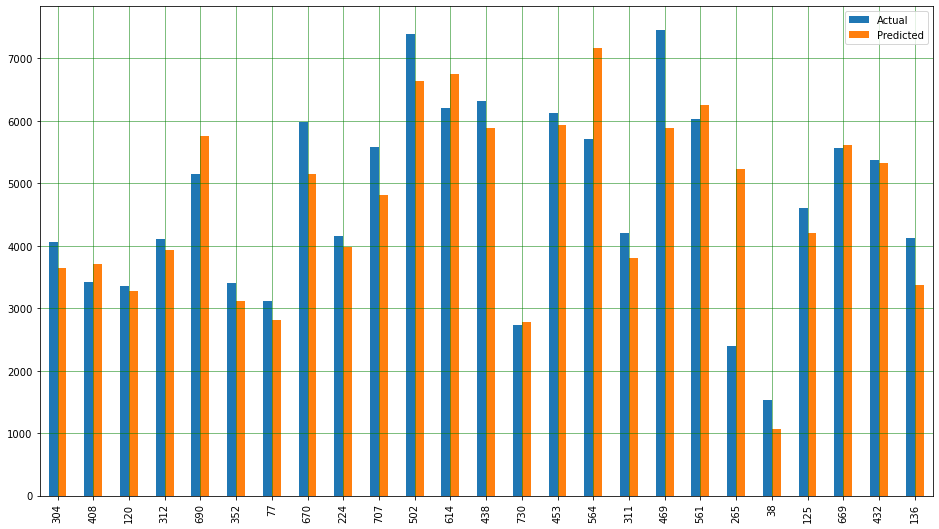

In [61]:
#Now let's plot the comparison of Actual and Predicted values
RF_chk_25.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [62]:
#The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, RF_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RF_pred)))

Mean Absolute Error: 464.2127322404371
Mean Squared Error: 409515.64713497274
Root Mean Squared Error: 639.9340959309582


In [63]:
#Prediction Accuracy and Rsquared
r2 = Rsquare(y_test, RF_pred)
r21 = r2.ravel()
rsquared = float(r21[1])
print("Rsquared =", rsquared)
print("Accuracy = ",round((100-mape(y_test, RF_pred)),2),'%')

Rsquared = 0.8920472951571087
Accuracy =  87.79 %


Clearly, the Random Forest Regressor gives better prediction of the cnt. We will now optimize this model for a better prediction by hyperparameter tuning

# Optimization by parameter tuning

In [64]:
# Look at parameters used by our current forest


from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF_regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# GridSearchCV

Grid Search
In this grid search I will try different combinations of RF hyperparameters.

Most important hyperparameters of Random Forest:

n_estimators = n of trees;
max_features = max number of features considered for splitting a node;
max_depth = max number of levels in each decision tree;
min_samples_split = min number of data points placed in a node before the node is split;
min_samples_leaf = min number of data points allowed in a leaf node;
bootstrap = method for sampling data points (with or without replacement)

As for how I decided the numbers to try I simply followed the advice of Aurelion Geron (2017): 'When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search)'.

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 50], 'max_features': [10, 30], 
 'max_depth': [10, 100, None], 'bootstrap': [True,False]}
]

grid_search_forest = GridSearchCV(RF_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 100, None],
                          'max_features': [10, 30], 'n_estimators': [10, 50]}],
             scoring='neg_mean_squared_error')

In [66]:
#now let's see how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

745.4903623642763 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
717.3140221784334 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 50}
761.5800308367545 {'bootstrap': True, 'max_depth': 10, 'max_features': 30, 'n_estimators': 10}
729.4863061927525 {'bootstrap': True, 'max_depth': 10, 'max_features': 30, 'n_estimators': 50}
732.510296584402 {'bootstrap': True, 'max_depth': 100, 'max_features': 10, 'n_estimators': 10}
704.6070698946811 {'bootstrap': True, 'max_depth': 100, 'max_features': 10, 'n_estimators': 50}
771.3399720895575 {'bootstrap': True, 'max_depth': 100, 'max_features': 30, 'n_estimators': 10}
730.7473562433923 {'bootstrap': True, 'max_depth': 100, 'max_features': 30, 'n_estimators': 50}
730.5305789159521 {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 10}
704.6778520029889 {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 50}
763.7781592101239 {'bootstrap': True, 'max_

In [67]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=100, max_features=10,
                      n_estimators=50)

In [68]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 100.0 %


In [69]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.25


In [70]:
# extract the numerical values of feature importance from the grid search
importances = grid_search_forest.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
#Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
feature_imp = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(feature_imp['importance'])
feature= list(feature_imp['feature'])

print(feature_imp)

    importance       feature
0     0.309262          temp
1     0.159000          yr_0
2     0.122103      season_1
3     0.116324          yr_1
4     0.061452           hum
5     0.038601     windspeed
6     0.025000  weathersit_3
7     0.024612      season_3
8     0.018867  weathersit_1
9     0.016292        mnth_1
10    0.014137      season_4
11    0.011019  weathersit_2
12    0.007385       mnth_12
13    0.007297        mnth_2
14    0.007151        mnth_3
15    0.005526        mnth_4
16    0.005188  workingday_0
17    0.005152  workingday_1
18    0.005001      season_2
19    0.004206       mnth_10
20    0.003739        mnth_9
21    0.003660     weekday_6
22    0.003086     weekday_1
23    0.002965     weekday_0
24    0.002781     weekday_2
25    0.002652     weekday_3
26    0.002608     weekday_5
27    0.002479     weekday_4
28    0.002436     holiday_0
29    0.002378       mnth_11
30    0.001968     holiday_1
31    0.001945        mnth_6
32    0.001562        mnth_5
33    0.001184

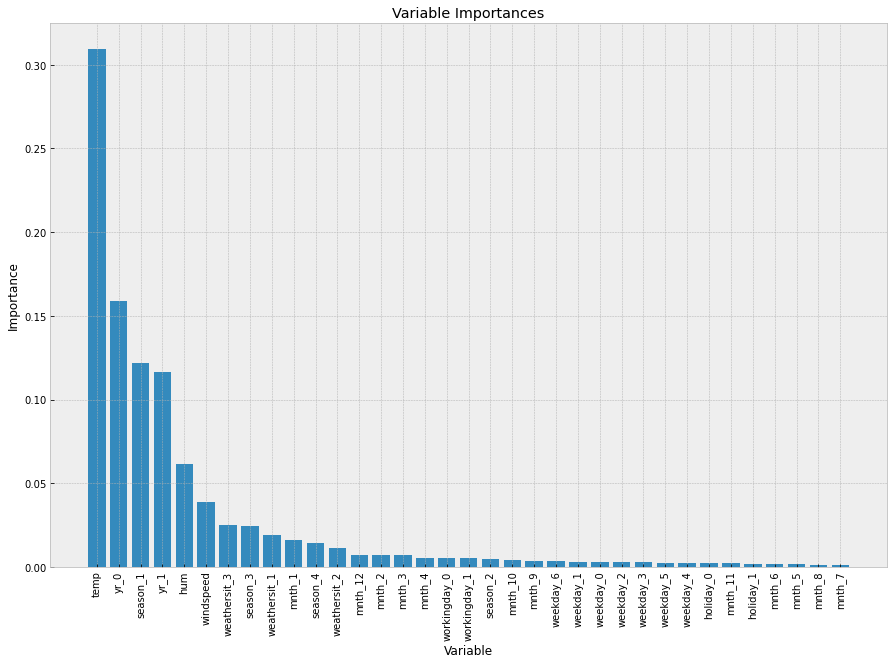

In [71]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In conclusion, these are my final considerations on the model:
the best feature to reliably predict the count of Bike is temperature. After temperature that there is a group of features including: Spring season, humidity, fall season,windspeed, the month of January, weather situation Clear, Few clouds, Partly cloudy. Thus, it seems that the best features are primarily related to the environmental and seasonal settings.

In [89]:
final_model = grid_search_forest.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X)

In [91]:
#Check the difference between the actual value and predicted value.
RF_optimized_chk = pd.DataFrame({'Actual': y, 'Predicted': final_pred})
RF_optimized_chk_25=chk.head(25)
RF_optimized_chk_25

,Actual,Predicted
304,4068,3650.072357
408,3422,3705.534839
120,3351,3280.566820
312,4109,3926.946011
690,5146,5757.250249
352,3403,3124.444573
77,3117,2807.050925
670,5986,5144.847335
224,4150,3973.644728
707,5582,4812.587386


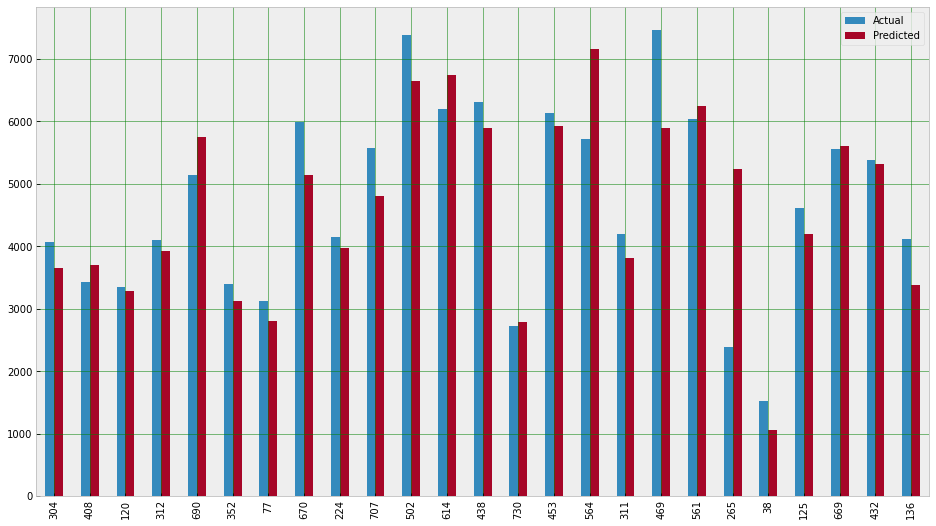

In [92]:
#Now let's plot the comparison of Actual and Predicted values
RF_optimized_chk_25.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [93]:
#The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE.
print('Mean Absolute Error:', metrics.mean_absolute_error(y, final_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, final_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, final_pred)))

Mean Absolute Error: 116.69567715458277
Mean Squared Error: 106733.5786106703
Root Mean Squared Error: 326.70105388668446


In [94]:
#Prediction Accuracy  
#calculate accuracy
errors = abs(final_pred - y)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 96.92 %


# RandomsearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV


In [78]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [95]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF_regressor, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.1s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
#now let's see how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

1818.110097021603 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
1898.3061456497041 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
939.6074391961944 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
958.4412934602924 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
1784.6517436418076 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
912.4750996686641 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
896.908489112711 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
937.4930262554215 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
1768.848018523889 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
930.6220844056214 {'n_estimators': 110, 'min_samples_split

In [97]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155)

In [98]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [99]:
#Prediction Accuracy  
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(X)
errors = abs(random_best - y)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 77.92 %


In [101]:
#this is the RMSE
final_mse = mean_squared_error(y, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 410.8


In [103]:
#Final prediction
#From the above models, Random forest performed the best with lowest RMSE and highest accuracy. Therefore, we select it for the final prediction.
final_model = grid_search_forest.best_estimator_
# Predicting test set results
final_prediction = final_model.predict(X)


In [104]:
df['predicted count']=Final_prediction
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,predicted count
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1159.16
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,1170.81
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,1373.42
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,1557.98
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,1570.76


In [105]:
#SAVE CSV WITH PREDICTED FARE
df.to_csv('PREDICTED_BikeCount_PYTHON.csv')

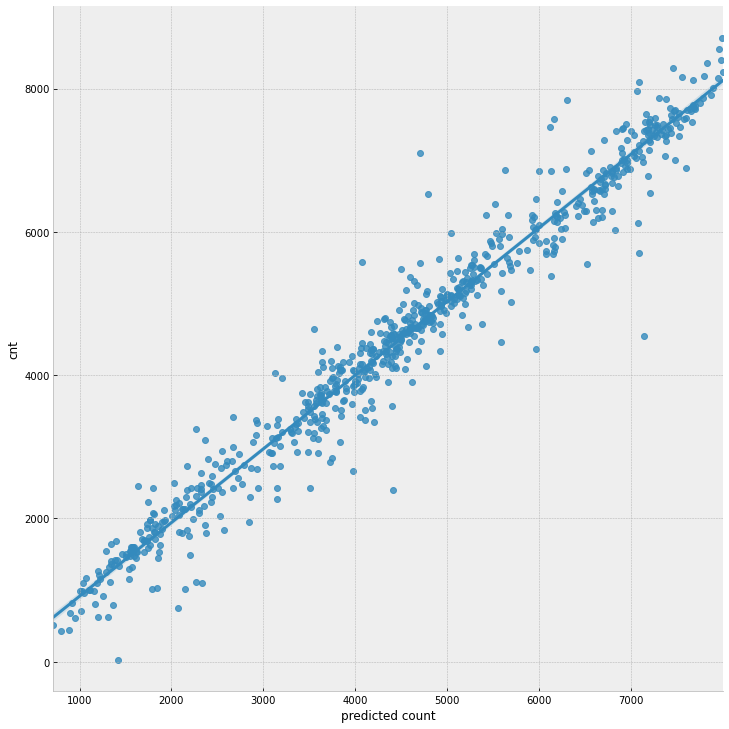

In [107]:
sns.lmplot(x ='predicted count', y ='cnt', data = df, aspect = 1, 
           height =10)